# 데이콘 사물 이미지 분류 경진대회  
- CIFAR 10 데이터셋

## EDA
https://dacon.io/competitions/official/235874/codeshare/4549?page=1&dtype=recent

### 데이터 로드

필요한 패키지 임포트

In [1]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
import tensorflow as tf
from tensorflow import keras
PIL.Image

<module 'PIL.Image' from '/usr/local/lib/python3.7/dist-packages/PIL/Image.py'>

keras datasets에 저장되어 있는 cifar10 데이터셋 로드

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


### 간단한 데이터셋 dimension 확인

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 랜덤한 훈련데이터 10개 시각화
각 이미지의 라벨도 표시

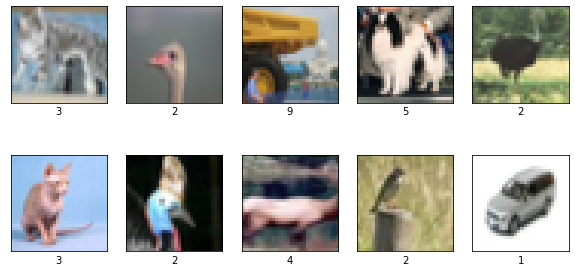

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,50000)
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[num][0])
    plt.imshow(X_train[num])
plt.show()

### 레이블 종류와 각 레이블에 해당하는 데이터 개수 출력

In [5]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

데이터셋 분포 막대그래프로 시각화

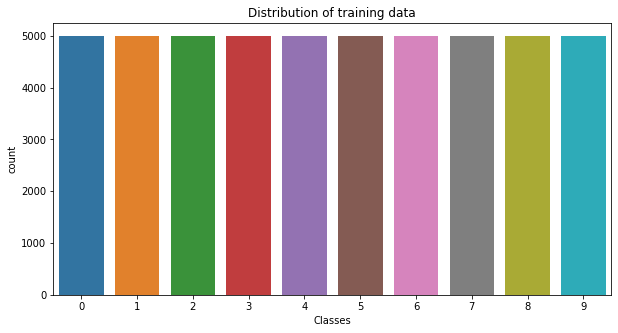

In [6]:
plt.figure(figsize=[10,5])
sns.countplot(y_train.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

## Baseline 1. Tensorflow를 활용한 이미지 분류
https://dacon.io/competitions/official/235874/codeshare/4548?page=1&dtype=recent

### 데이터 전처리

훈련 데이터셋-> 훈련, 검증 데이터셋으로 분할

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (40000, 32, 32, 3)
X_valid 크기: (10000, 32, 32, 3)
X_test  크기: (10000, 32, 32, 3)


이미지의 픽셀 RGB값 정규화 (0-255 ->0-1)

In [9]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

### 모델 생성

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    tf.keras.layers.Dropout(0.23), # 무작위로 퍼셉트론 비활성화(23%)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
    tf.keras.layers.Dense(1024, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax') # ouput layer
])

### 모델 컴파일

In [11]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

### 모델 summary  
- 각 층의 이름, output shape, 학습 파라미터 개수 표시

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

### 모델 학습

In [13]:
history=model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
313/313 [==============================] - 11s 8ms/step - loss: 1.8254 - accuracy: 0.3288 - val_loss: 1.5722 - val_accuracy: 0.4412
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 1.4987 - accuracy: 0.4551 - val_loss: 1.3522 - val_accuracy: 0.5179
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 1.3816 - accuracy: 0.5004 - val_loss: 1.2780 - val_accuracy: 0.5396
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 1.2979 - accuracy: 0.5318 - val_loss: 1.2010 - val_accuracy: 0.5667
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 1.2360 - accuracy: 0.5582 - val_loss: 1.1349 - val_accuracy: 0.5930
Epoch 6/10
313/313 [==============================] - 1s 5ms/step - loss: 1.1783 - accuracy: 0.5782 - val_loss: 1.0818 - val_accuracy: 0.6169
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 1.1395 - accuracy: 0.5940 - val_loss: 1.0222 - val_accuracy: 0.6406
Epoch

### 학습 결과 출력, 시각화

훈련 데이터셋의 훈련 정확도

In [14]:
history.history['accuracy']

[0.3287999927997589,
 0.45509999990463257,
 0.5004000067710876,
 0.5317749977111816,
 0.5582000017166138,
 0.5781750082969666,
 0.5940499901771545,
 0.6045250296592712,
 0.6236500144004822,
 0.6329500079154968]

훈련 데이터셋의 훈련 손실값

In [15]:
history.history['loss']

[1.8253966569900513,
 1.498683214187622,
 1.3815759420394897,
 1.2979404926300049,
 1.2359540462493896,
 1.1782950162887573,
 1.139464020729065,
 1.1001436710357666,
 1.0609331130981445,
 1.032867431640625]

검증 데이터셋의 훈련 정확도

In [16]:
history.history['val_accuracy']

[0.44119998812675476,
 0.5178999900817871,
 0.5396000146865845,
 0.5666999816894531,
 0.5929999947547913,
 0.6169000267982483,
 0.6406000256538391,
 0.6600000262260437,
 0.6632999777793884,
 0.6604999899864197]

검증 데이터셋의 훈련 손실값

In [17]:
history.history['val_loss']

[1.5721796751022339,
 1.3521558046340942,
 1.2779991626739502,
 1.2009799480438232,
 1.1349393129348755,
 1.0818066596984863,
 1.022244930267334,
 0.9727503061294556,
 0.945878803730011,
 0.9394689202308655]

정확도, 오차 에포크 진행에 따른 변화 시각화

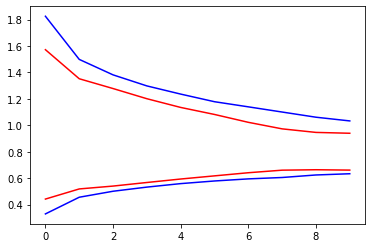

In [18]:
epoch_nb_list=[i for i in range(10)]
plt.plot(epoch_nb_list , history.history['accuracy'],'b')
plt.plot(epoch_nb_list , history.history['loss'],'b')
plt.plot(epoch_nb_list , history.history['val_accuracy'],'r')
plt.plot(epoch_nb_list , history.history['val_loss'],'r')
plt.show()

### 테스트데이터로 추론

첫 다섯 개의 데이터 추론 레이블 확인

In [19]:
from sklearn.preprocessing import LabelEncoder

label_name=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
le = LabelEncoder()
le.fit(label_name)

pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['cat', 'ship', 'ship', 'airplane', 'frog'], dtype='<U10')

추론한 첫 5개의 테스트 데이터의 타깃 레이블 확인

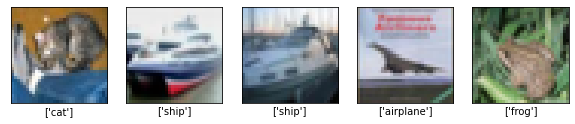

In [20]:
plt.figure(figsize=[10,5])
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(le.inverse_transform([y_test[i][0]]))
    plt.imshow(X_test[i])
plt.show()

## Pytorch를 이용한 CIFAR10 데이터셋 CNN 모델 학습

pytorch cifar10 튜토리얼
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### 패키지 임포트

In [21]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import tqdm

### 데이터셋 로드, train/test loader 구성

In [22]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


데이터셋 차원, 자료형 출력

In [23]:
print(trainset.data.shape)
print(testset.data.shape)
print(type(trainset.data))
print(type(testset.data))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 첫 4개의 훈련데이터 시각화

 ship horse horse  ship


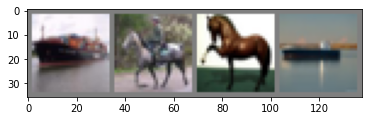

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 모델의 층 구성

In [25]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 손실함수, 옵티마이저 설정

In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### CPU로 10에포크동안 훈련

In [27]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.151
[1,  4000] loss: 1.876
[1,  6000] loss: 1.677
[1,  8000] loss: 1.598
[1, 10000] loss: 1.521
[1, 12000] loss: 1.468
[2,  2000] loss: 1.408
[2,  4000] loss: 1.373
[2,  6000] loss: 1.341
[2,  8000] loss: 1.323
[2, 10000] loss: 1.304
[2, 12000] loss: 1.301
[3,  2000] loss: 1.212
[3,  4000] loss: 1.212
[3,  6000] loss: 1.207
[3,  8000] loss: 1.198
[3, 10000] loss: 1.208
[3, 12000] loss: 1.171
[4,  2000] loss: 1.088
[4,  4000] loss: 1.105
[4,  6000] loss: 1.123
[4,  8000] loss: 1.097
[4, 10000] loss: 1.099
[4, 12000] loss: 1.094
[5,  2000] loss: 1.022
[5,  4000] loss: 1.035
[5,  6000] loss: 1.034
[5,  8000] loss: 1.046
[5, 10000] loss: 1.021
[5, 12000] loss: 1.025
[6,  2000] loss: 0.929
[6,  4000] loss: 0.943
[6,  6000] loss: 0.961
[6,  8000] loss: 0.994
[6, 10000] loss: 1.005
[6, 12000] loss: 0.973
[7,  2000] loss: 0.878
[7,  4000] loss: 0.925
[7,  6000] loss: 0.923
[7,  8000] loss: 0.933
[7, 10000] loss: 0.948
[7, 12000] loss: 0.935
[8,  2000] loss: 0.842
[8,  4000] 

배치사이즈를 4로 설정해 데이터 개수가 12000개 까지만 출력됨  
한 에포크가 돌아가는 와중에 떨어지는 손실값을 확인하기 위해 미니배치의 각 2000개 데이터 학습 진행마다 전체 손실값 출력

### 테스트셋으로 정확도 평가

In [ ]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import tqdm

In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


#### 각 클래스의 분류 정확도 출력

In [29]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 74 %
Accuracy of  bird : 57 %
Accuracy of   cat : 41 %
Accuracy of  deer : 59 %
Accuracy of   dog : 36 %
Accuracy of  frog : 74 %
Accuracy of horse : 62 %
Accuracy of  ship : 75 %
Accuracy of truck : 72 %


### GPU 이용한 훈련
위의 CPU 훈련 이후 바로 GPU 사용하게 되면 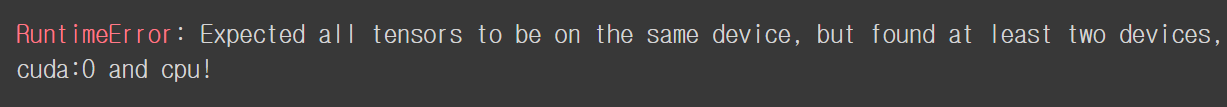  
런타임 에러 출력됨

=>런타임 초기화 이후 아래의 코드로 진행

In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

#### GPU 사용 여부 출력
- device는 CUDA device를 의미

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


#### 데이터셋 로드, train/test loader 구성

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### 데이터셋 차원, 자료형 출력

In [4]:
print(trainset.data.shape)
print(testset.data.shape)
print(type(trainset.data))
print(type(testset.data))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### 모델의 층 구성

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### 손실함수, 옵티마이저 설정

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### net을 GPU device로 전송

In [7]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

입력 데이터와 타깃데이터를 GPU로 매 반복마다 전송해야 함

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        #입력 데이터와 타깃데이터를 GPU로 매 반복마다 전송해야 함
        inputs, labels = inputs.to(device), labels.to(device)
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.177
[1,  4000] loss: 1.856
[1,  6000] loss: 1.683
[1,  8000] loss: 1.583
[1, 10000] loss: 1.502
[1, 12000] loss: 1.452
[2,  2000] loss: 1.385
[2,  4000] loss: 1.358
[2,  6000] loss: 1.312
[2,  8000] loss: 1.287
[2, 10000] loss: 1.291
[2, 12000] loss: 1.266
[3,  2000] loss: 1.182
[3,  4000] loss: 1.201
[3,  6000] loss: 1.187
[3,  8000] loss: 1.166
[3, 10000] loss: 1.200
[3, 12000] loss: 1.166
[4,  2000] loss: 1.090
[4,  4000] loss: 1.098
[4,  6000] loss: 1.081
[4,  8000] loss: 1.111
[4, 10000] loss: 1.093
[4, 12000] loss: 1.097
[5,  2000] loss: 1.012
[5,  4000] loss: 1.032
[5,  6000] loss: 1.031
[5,  8000] loss: 1.034
[5, 10000] loss: 1.043
[5, 12000] loss: 1.030
[6,  2000] loss: 0.920
[6,  4000] loss: 0.974
[6,  6000] loss: 0.941
[6,  8000] loss: 0.981
[6, 10000] loss: 1.000
[6, 12000] loss: 1.004
[7,  2000] loss: 0.906
[7,  4000] loss: 0.914
[7,  6000] loss: 0.906
[7,  8000] loss: 0.951
[7, 10000] loss: 0.942
[7, 12000] loss: 0.948
[8,  2000] loss: 0.847
[8,  4000] 

#### 테스트셋으로 정확도 평가

In [ ]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import tqdm

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


#### 각 클래스의 분류 정확도 출력

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 74 %
Accuracy of  bird : 57 %
Accuracy of   cat : 41 %
Accuracy of  deer : 59 %
Accuracy of   dog : 36 %
Accuracy of  frog : 74 %
Accuracy of horse : 62 %
Accuracy of  ship : 75 %
Accuracy of truck : 72 %
